## First we need to load some things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Shape_Maker import Data_Generator, make_rectangle, make_circle
from Visualizing_Model.Visualing_Model import visualization_model_class

Using TensorFlow backend.


In [2]:
%matplotlib notebook

In [3]:
image_size = 64

## The make_rectangle and make_circle will both return circles and rectangles, and the Data_Generator will randomly create circles or rectangles

<IPython.core.display.Javascript object>


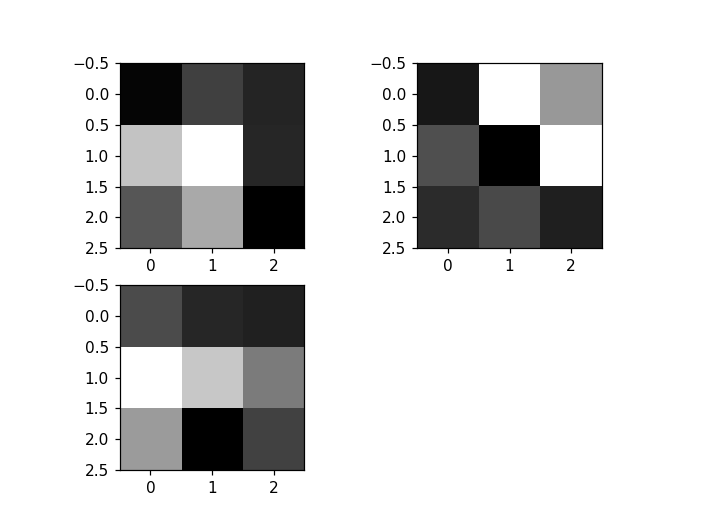

In [4]:
plt.imshow(make_rectangle(image_size))

In [5]:
plt.imshow(make_circle(image_size))

## What do we need? We need a way to generate larges amounts of training data for our model..

### This is a 'generator', it is something which continously creates data

In [6]:
train_generator = Data_Generator(image_size=image_size,batch_size=64, num_examples_per_epoch=100)

In [7]:
x,y = train_generator.__getitem__(0)
print(x.shape)
print(y.shape)

(64, 64, 64, 1)
(64, 2)


### X will be out data set, this will have a size [64 , 50, 50, 1]
This is 64 examples, of a 50x50 image, with 1 channel
### Y is our output class, we have two classes: box and not box, so a shape of [64, 2]

## Now lets make our network!

In [8]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from keras.optimizers import Adam

In [9]:
model = Sequential([
    Conv2D(4, (3,3), input_shape=(image_size, image_size, 1), padding='same',name='Conv_0'), # Make 4 kernels,
    MaxPool2D((image_size)), # Pool into a 1x1x6 image
    Flatten(),
    Dense(2),
    Activation('softmax')
])

W1014 20:20:32.066582  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1014 20:20:32.079617  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1014 20:20:32.081627  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1014 20:20:32.092651  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool

In [10]:
model.compile(Adam(lr=1e-1), loss='categorical_crossentropy', metrics=['accuracy'])

W1014 20:20:32.129791  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1014 20:20:32.137814  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit_generator(train_generator,epochs=3)

W1014 20:20:32.214040  6708 deprecation.py:323] From c:\users\bmanderson\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1014 20:20:32.253242  6708 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
100/100 [==============================] - 2s 21ms/step - loss: 0.0816 - acc: 0.9736
Epoch 2/3
100/100 [==============================] - 2s 19ms/step - loss: 4.3617e-04 - acc: 1.0000
Epoch 3/3
100/100 [==============================] - 2s 20ms/step - loss: 1.9513e-04 - acc: 1.0000


In [24]:
def determine_accuracy(model, image_size= 64, num_examples=1000):
    truth = np.zeros((num_examples,1))
    guess = np.zeros((num_examples,1))
    index = 0
    for _ in range(num_examples//2):
        pred = model.predict(make_rectangle(image_size)[None,...,None])
        guess[index] = np.argmax(pred)
        truth[index] = 1
        index += 1
    for _ in range(num_examples//2):
        pred = model.predict(make_circle(image_size)[None,...,None])
        guess[index] = np.argmax(pred)
        index += 1
    print('Accuracy is {} for {} examples'.format(str((guess==truth).sum()/num_examples),num_examples))

In [ ]:
rectangle = make_rectangle(image_size)[None,...,None]
circle = make_circle(image_size)[None,...,None]
model.predict()

## Lets see what the kernels and activations look like

In [57]:
Visualizing_Class = visualization_model_class(model=model, desired_layer_names=['Conv_0'])

## Kernels

['Conv_0']
Conv_0
0.0


<IPython.core.display.Javascript object>


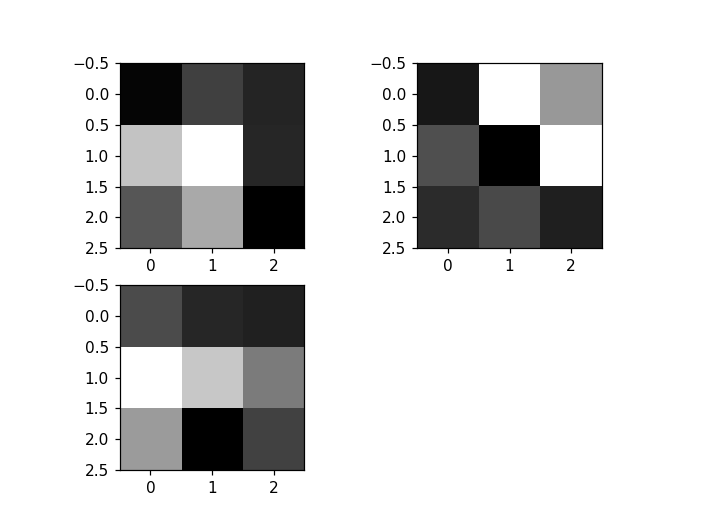

In [44]:
Visualizing_Class.plot_kernels()

## Activations
#### In order to make an activation map we need to provide it with something to predict on

In [60]:
Visualizing_Class.predict_on_tensor(make_rectangle(image_size)[None,...,None])

In [61]:
Visualizing_Class.activations
# Circles have activation max pooling of [1.4, 3.2, 1, 4.2]
# Rectangles have [3, 1.3, 1.2, 1.4]

array([[[[3.024499 , 1.3477976, 1.254214 , 1.4281414]]]], dtype=float32)

array([[1.7446796e-04, 9.9982554e-01]], dtype=float32)

['Conv_0']
Conv_0
0.0


<IPython.core.display.Javascript object>


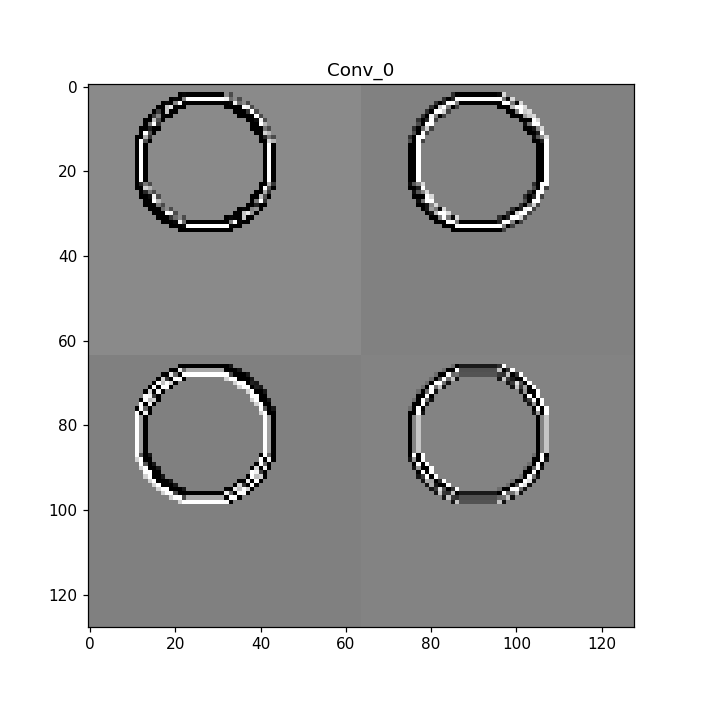

In [56]:
Visualizing_Class.plot_activations()

In [25]:
determine_accuracy(model, image_size=image_size)

Accuracy is 1.0 for 1000 examples
